![alt text](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTK4gQ9nhwHHaSXMHpeggWg7twwMCgb877smkRmtkmDeDoGF9Z6&usqp=CAU)

#  <font color='Blue'> Análise Exploratória dos Dados</font> 

# Dicionário de Dados
![](https://cienciadosdados.com/images/2022/AD.png)

# Conexão com os Dados
![](https://i2.wp.com/www.aceql.com/wp-content/uploads/2021/08/AceQL-Schema-min.jpg?ssl=1)

In [2]:
# Conexão com os Dados
import pandas as pd
df = pd.read_excel('/content/clientes_investimentos.xlsx')
df

,cliente,poupanca,cdb,renda,segmentacao,seguro
0,537044639,663,8975,94537,40,1
1,876520833,586,2268,80444,13,1
2,881113910,1411,7682,93024,40,1
3,891866209,842,114,87118,40,1
4,810003285,182,2764,66214,40,0
...,...,...,...,...,...,...
32556,816950489,1207,1760,14038,38,0
32557,806707803,200,6638,26564,40,1
32558,730303105,1026,9121,14222,40,0
32559,770056517,693,3049,59841,20,1


In [3]:
# verificar dimensões do dataset
df.shape

(32561, 6)

In [4]:
# Informações sobre as variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   cliente      32561 non-null  int64
 1   poupanca     32561 non-null  int64
 2   cdb          32561 non-null  int64
 3   renda        32561 non-null  int64
 4   segmentacao  32561 non-null  int64
 5   seguro       32561 non-null  int64
dtypes: int64(6)
memory usage: 1.5 MB


In [ ]:
# Verifica valores missing (ausentes , nulos)
df.isnull().sum()

In [ ]:
# Verifica valores duplicados
df.duplicated().sum()

# Análise Estatística
![](https://qph.fs.quoracdn.net/main-qimg-da056fb5f41719bd37c30f7631b79782-lq)

In [ ]:
# Estatística Descritiva das variáveis numéricas do Dataset
df.describe()

In [8]:
# Frequencia das variáveis categoricas (que possuem ao invés de uma sequencia de números, possuem categorias a, b, c...)
df['seguro'].value_counts()

1    21790
0    10771
Name: seguro, dtype: int64

In [9]:
# Criação de Campos 
df['invest_total'] = df['poupanca'] + df['cdb']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
0,537044639,663,8975,94537,40,1,9638
1,876520833,586,2268,80444,13,1,2854
2,881113910,1411,7682,93024,40,1,9093
3,891866209,842,114,87118,40,1,956
4,810003285,182,2764,66214,40,0,2946
...,...,...,...,...,...,...,...
32556,816950489,1207,1760,14038,38,0,2967
32557,806707803,200,6638,26564,40,1,6838
32558,730303105,1026,9121,14222,40,0,10147
32559,770056517,693,3049,59841,20,1,3742


In [10]:
df.corr(method='spearman')

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total
cliente,1.000000,0.008027,0.005965,0.002343,0.004825,0.003920,0.007076
poupanca,0.008027,1.000000,0.001554,0.001629,-0.003215,-0.000435,0.143101
cdb,0.005965,0.001554,1.000000,0.000237,-0.005636,0.003532,0.989646
renda,0.002343,0.001629,0.000237,1.000000,0.007299,-0.004185,0.000501
segmentacao,0.004825,-0.003215,-0.005636,0.007299,1.000000,0.264941,-0.006230
seguro,0.003920,-0.000435,0.003532,-0.004185,0.264941,1.000000,0.003455
invest_total,0.007076,0.143101,0.989646,0.000501,-0.006230,0.003455,1.000000


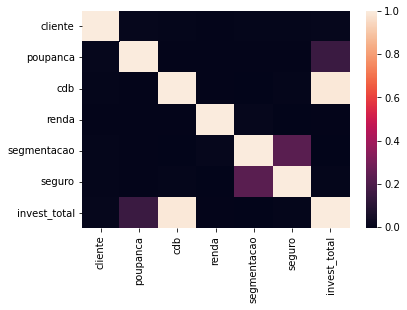

In [11]:
import seaborn as sns
ax = sns.heatmap(df.corr(method='pearson'))

# Criação de Campos para Aprofundar a Análise 
![](https://j.gifs.com/RoxQGO.gif)

In [12]:
# Criação de Campos 
df['perc_cdb'] = df['cdb'] / df['invest_total']
df

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
0,537044639,663,8975,94537,40,1,9638,0.931210
1,876520833,586,2268,80444,13,1,2854,0.794674
2,881113910,1411,7682,93024,40,1,9093,0.844826
3,891866209,842,114,87118,40,1,956,0.119247
4,810003285,182,2764,66214,40,0,2946,0.938221
...,...,...,...,...,...,...,...,...
32556,816950489,1207,1760,14038,38,0,2967,0.593192
32557,806707803,200,6638,26564,40,1,6838,0.970752
32558,730303105,1026,9121,14222,40,0,10147,0.898886
32559,770056517,693,3049,59841,20,1,3742,0.814805


# Realização de Filtros
![](https://i.gifer.com/origin/46/4645b5c1b28b702694757fcd99a4ec6d.gif)

In [ ]:
#filtrando registros do dataset com loc
df.loc[df.renda > 99990]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
4968,745335138.0,1427,7849,99998,50.0,1.0,9276,0.846162
8597,842006314.0,615,3800,99994,40.0,1.0,4415,0.860702
25922,874467515.0,1469,555,99999,40.0,1.0,2024,0.274209
30382,793615862.0,573,401,99995,52.0,1.0,974,0.411704


In [ ]:
#filtrando registros do dataset com loc
df.loc[df.perc_cdb > 0.98]

,cliente,poupanca,cdb,renda,segmentacao,seguro,invest_total,perc_cdb
6,744840078.0,104,9994,7679,16.0,0.0,10098,0.989701
41,804542270.0,24,5008,81378,40.0,1.0,5032,0.995231
66,890632045.0,17,1254,99552,40.0,0.0,1271,0.986625
85,882285895.0,77,8595,23252,35.0,0.0,8672,0.991121
90,786262548.0,15,1250,52603,40.0,1.0,1265,0.988142
...,...,...,...,...,...,...,...,...
32490,838184534.0,47,6930,8553,35.0,1.0,6977,0.993264
32521,730244116.0,46,6312,55710,40.0,1.0,6358,0.992765
32545,865829262.0,61,8697,81233,20.0,0.0,8758,0.993035
32549,872597289.0,61,6840,87053,40.0,0.0,6901,0.991161


In [ ]:
df.loc[(df.renda > 90000) & (df.perc_cdb > 0.98)]

In [ ]:
#iloc: selecionando pela faixa de ´indice de 2 até 10 (10 é exclusivo)
df.iloc[0:10]

# Análise Gráfica
![](https://raw.githubusercontent.com/infinum/flutter-charts/feature/render-object/assets/showcase.gif)

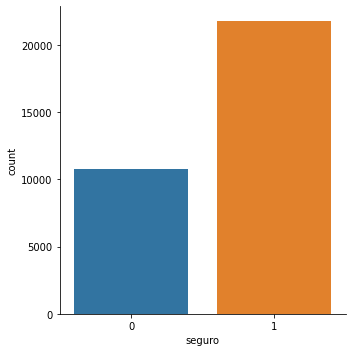

In [15]:
# importar o Sns
import seaborn as sns
# Visualização Gráfica dos dados
sns.catplot(x="seguro", kind="count",  data=df);

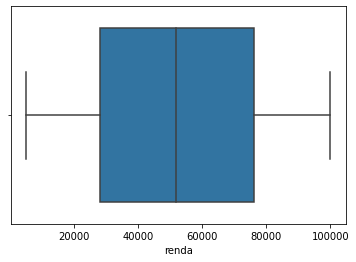

In [16]:
# Visualização Gráfica dos dados
sns.boxplot(x="renda",   data=df);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


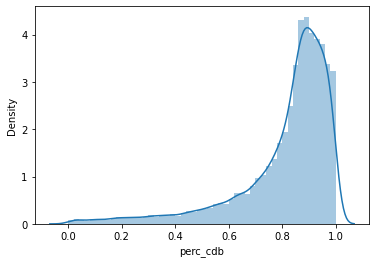

In [17]:
# Visualização Gráfica dos dados
sns.distplot(df.perc_cdb	, kde=True)

##Fim